In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/News+LPReports/Graph

/content/gdrive/MyDrive/News+LPReports/Graph


In [ ]:
import pandas as pd
import numpy as np
import requests
import json

# Load excel sheets for VVCN

In [ ]:
vvcn1 = pd.read_excel('data/Jan2021.xlsx', sheet_name='VVCN')
vvcn1.head(3)

,Team,Urgency,Interest,Combined,Name,Entity,IM,Vertex Shareholding (Fully Diluted),Remaining Cost as at Dec19 (US$),NBV before Current Impairment as at Dec19 (US$),Fair value as at Sep19 (US$),Proposed Fair Value as at Dec19 (US$),Basis / Comments,QoQ FV Change (US$),FV Basis,Business,Sector,Last Series,Amount (USD M) invested by VVCN,Timing,Pre-Money Valuation (USD M),Post-Money Valuation (USD M),Update,Risks imposed by COVID-19,Comments/Updates as of Jan 2021,Name of Competitors
0,NaN,NaN,NaN,0.0,Breadtrip,VAI (Fund I),XY,0.1339,2000000,2000000,3.57376e+06,2.91737e+06,"In Dec14, the company raised a US$20m financin...",-656389,FV at last financing round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0.0,Yoho,VAI (Fund I),XY,0.0876,8.77972e+06,8.77972e+06,2.19093e+07,2.19093e+07,"No change. In Jun 15, Yoho closed a Series E f...",-,FV at last financing round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
vvcn1 = vvcn1[['Urgency ','Interest ','Name','Basis / Comments','Business','Sector','Comments/Updates as of Jan 2021']]
vvcn1 = vvcn1.sort_values(by=['Name'])
vvcn1.head(3)

,Urgency,Interest,Name,Basis / Comments,Business,Sector,Comments/Updates as of Jan 2021
69,3,4.0,ArrayComm,NaN,ArrayComm focuses in the development and promo...,Tech enabler,"- Japan BD [LP, VGF value-add]\n- Long financi..."
18,NaN,NaN,Beijing Bridge CC Sports Technology,No change. Vertex invested in the Series Seed ...,NaN,NaN,NaN
43,2,2.0,Binance,No change. Vertex participated in the Series A...,Binance Asia is a platform set up in Singapore...,Tech-Enabler,Study in VVSEA section


In [ ]:
vvcn2 = pd.read_excel('data/May2021.xlsx', sheet_name='VVCN')
vvcn2.head(3)

,Team,Urgency,Interest,Combined,Name,Entity,IM,Vertex Shareholding (Fully Diluted),Remaining Cost as at Dec19 (US$),NBV before Current Impairment as at Dec19 (US$),Fair value as at Sep19 (US$),Proposed Fair Value as at Dec19 (US$),Basis / Comments,QoQ FV Change (US$),FV Basis,Business,Sector,Last Series,Amount (USD M) invested by VVCN,Timing,Pre-Money Valuation (USD M),Post-Money Valuation (USD M),Update,Risks imposed by COVID-19,Comments/Updates as of Jan 2021,Comments/Updates as of May 2021,Name of Competitors
0,NaN,0,0.0,0.0,ActionSoft (write down),VAI (Fund I),XZJ,0.1425,3.69587e+06,3.69587e+06,1.84794e+06,1.84794e+06,"No change. As of Oct 19, the company has cash ...",-,FV below cost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<text> [Source, Signal]:\n<copy paste> / <seco...",NaN,NaN
1,NaN,NaN,NaN,0.0,Breadtrip (low interest),VAI (Fund I),XY,0.1339,2000000,2000000,3.57376e+06,2.91737e+06,"In Dec14, the company raised a US$20m financin...",-656389,FV at last financing round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0,0.0,0.0,Meilele Inc (write down),VAI (Fund I),XY,0.0359,4.65247e+06,4.65247e+06,6.78697e+06,2.32623e+06,"In Aug 15, the company closed a Series D1 fina...",-4.46073e+06,FV reduced to 50% of Q319 FV in Dec 19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
vvcn2 = vvcn2[['Urgency ','Interest ','Name','Basis / Comments','Business','Sector','Comments/Updates as of May 2021']]
vvcn2 = vvcn2.sort_values(by=['Name'])
vvcn2.head(3)

,Urgency,Interest,Name,Basis / Comments,Business,Sector,Comments/Updates as of May 2021
0,0,0.0,ActionSoft (write down),"No change. As of Oct 19, the company has cash ...",NaN,NaN,NaN
60,NaN,NaN,AnHeart,NaN,Anheart is a biopharmaceutical company which f...,Healthcare,\n• AnHeart licensed two clinical stage drugs...
59,3,4.0,ArrayComm,NaN,ArrayComm focuses in the development and promo...,\nTech enabler,"• In Q1 2021, the Company achieved revenue of ..."


In [ ]:
print(vvcn1.shape, vvcn2.shape)

(76, 7) (79, 7)


In [ ]:
# vvcn = pd.concat([vvcn1, vvcn2])
# vvcn = vvcn.sort_values(by=['Name'])
# vvcn.shape

In [ ]:
vvcn = pd.merge(vvcn1, vvcn2, how='outer', on='Name', suffixes=[None, '_2'])
vvcn.head(3)

,Urgency,Interest,Name,Basis / Comments,Business,Sector,Comments/Updates as of Jan 2021,Urgency _2,Interest _2,Basis / Comments_2,Business_2,Sector_2,Comments/Updates as of May 2021
0,3,4.0,ArrayComm,NaN,ArrayComm focuses in the development and promo...,Tech enabler,"- Japan BD [LP, VGF value-add]\n- Long financi...",3,4.0,NaN,ArrayComm focuses in the development and promo...,\nTech enabler,"• In Q1 2021, the Company achieved revenue of ..."
1,NaN,NaN,Beijing Bridge CC Sports Technology,No change. Vertex invested in the Series Seed ...,NaN,NaN,NaN,NaN,NaN,No change. Vertex invested in the Series Seed ...,NaN,NaN,NaN
2,2,2.0,Binance,No change. Vertex participated in the Series A...,Binance Asia is a platform set up in Singapore...,Tech-Enabler,Study in VVSEA section,2,3.0,No change. Vertex participated in the Series A...,Binance Asia is a platform set up in Singapore...,Tech-Enabler,>> 3rd tranche of Series A is at lower pre-mon...


In [ ]:
vvcn.drop(columns=['Urgency _2','Interest _2','Basis / Comments_2','Business_2','Sector_2'], inplace=True)
vvcn.head(3)

,Urgency,Interest,Name,Basis / Comments,Business,Sector,Comments/Updates as of Jan 2021,Comments/Updates as of May 2021
0,3,4.0,ArrayComm,NaN,ArrayComm focuses in the development and promo...,Tech enabler,"- Japan BD [LP, VGF value-add]\n- Long financi...","• In Q1 2021, the Company achieved revenue of ..."
1,NaN,NaN,Beijing Bridge CC Sports Technology,No change. Vertex invested in the Series Seed ...,NaN,NaN,NaN,NaN
2,2,2.0,Binance,No change. Vertex participated in the Series A...,Binance Asia is a platform set up in Singapore...,Tech-Enabler,Study in VVSEA section,>> 3rd tranche of Series A is at lower pre-mon...


In [ ]:
vvcn.to_csv('data/vvcn.csv')

# VVSEA

In [ ]:
vvsea1 = pd.read_excel('data/Jan2021.xlsx', sheet_name='VVSEA&I')
vvsea1.head(3)

,Team,Urgency,Interest,Combined,Company,Vertex Entity,HQ,Business,Sector,Last Series,Timing,Amount (USD) invested by VVSEA&I,Pre Valuation (USD),Post Val (USD),Comments/Updates,Thesis (Optional),Concern/DD Area (Optional),Risks imposed by COVID-19 (Optional),Comments/Updates as of Jan 2021,Name of Competitors
0,Tracy,NaN,NaN,NaN,Singapore Diamond Invesment Exchange,VAF(SG),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exchange is temporarily closed after google se...,NaN
1,YingJie,3.0,2.0,6.0,Hotelogix,VSEA,India,Provider of a hotel property management platfo...,Enterprise SaaS,C,2021-03-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,- Headwinds in the hotel industry in general d...,"Inroad, Guestline"
2,Ying Jie,5.0,2.0,10.0,FirstCry,VLCF,NaN,NaN,NaN,NaN,2017-09-01 00:00:00,NaN,349.0,450.0,NaN,NaN,NaN,NaN,"- $300 million revenue runrate [Hiok, Metrics]...",NaN


In [ ]:
vvsea1 = vvsea1[['Urgency','Interest','Company','Comments/Updates ','Business','Sector','Comments/Updates as of Jan 2021']]
vvsea1 = vvsea1.sort_values(by=['Company'])
vvsea1.head(3)

,Urgency,Interest,Company,Comments/Updates,Business,Sector,Comments/Updates as of Jan 2021
20,4.0,1.0,ACTIVE AI,- passed,Active AI develops chatbots for implementation...,AI,- CY20 revenue of $2.1M with net burn of $620k...
24,NaN,NaN,Ace Turtle,NaN,Omni-channel enabler for enterprise brands. It...,Enterprise,- $5million net revenue in November ($7.2milli...
32,2.0,4.0,Aruna,NaN,Indonesia-based B2B e-commerce of fish and sea...,B2B eCommerce,- capital crunch lowers Q3 2020 revenue as the...


In [ ]:
vvsea2 = pd.read_excel('data/May2021.xlsx', sheet_name='VVSEA&I')
vvsea2.head(3)

,Team,Urgency,Interest,Combined,Company,Vertex Entity,HQ,Business,Sector,Last Series,Timing,Amount (USD) invested by VVSEA&I,Pre Valuation (USD),Post Val (USD),Comments/Updates,Thesis (Optional),Concern/DD Area (Optional),Risks imposed by COVID-19 (Optional),Comments/Updates as of Jan 2021,Comments/Updates as of May 2021,Name of Competitors,Unnamed: 21
0,Hiok,3,3.0,9.0,SUNDAY,Fund 3,Thailand,Sunday is a digital insurtech startup that pro...,Insuretech,A1,2021-12-19 00:00:00,11.00,37.5,NaN,• Gross written premium (GWP) was $8.5M in 201...,NaN,NaN,- Sunday's fundamental insurance business is l...,• Jan 21 projected $2.3mil but likely t...,IC approved,NaN,NaN
1,Hiok,2,3.0,6.0,RECKO,Fund 3,India,Recko is a financial transaction reconciliatio...,Fintech,A,2021-02-20 00:00:00,6.00,16.0,NaN,- ~10 clients in Q1 2020 ; early traction,NaN,NaN,- might struggle with new client acquisition a...,- Hired sales lead who will come onboard Febru...,"- Got a $15m TS from Stripe at $80m post, 3x f...",NaN,NaN
2,Hiok,4,4.0,3.0,HOUSEJOY,NaN,India,Housejoy provides on-demand residential servic...,Marketplace,B1,2021-11-18 00:00:00,3.15,1.0,NaN,NaN,NaN,NaN,- COVID-19 is likely to have a negative impact...,"- Founders trying to raise money, Company is o...",Winding up,NaN,NaN


In [ ]:
vvsea2 = vvsea2[['Urgency','Interest','Company','Comments/Updates ','Business','Sector','Comments/Updates as of May 2021']]
vvsea2 = vvsea2.sort_values(by=['Company'])
vvsea2.head(3)

,Urgency,Interest,Company,Comments/Updates,Business,Sector,Comments/Updates as of May 2021
35,3,1.0,ACTIVE AI,- passed,Active AI develops chatbots for implementation...,AI,"- Revenue was US$745k in Q1 2021, up from US$5..."
5,NaN,NaN,Ace Turtle,NaN,Omni-channel enabler for enterprise brands. It...,Enterprise,- Waiting for Company to resume fundraise in July
20,1,4.0,Aruna,NaN,Indonesia-based B2B e-commerce of fish and sea...,B2B eCommerce,- Aruna raising $25M Series B round; signed te...


In [ ]:
vvsea = pd.merge(vvsea1, vvsea2, how='outer', on='Company', suffixes=[None, '_2'])
vvsea.head(3)

,Urgency,Interest,Company,Comments/Updates,Business,Sector,Comments/Updates as of Jan 2021,Urgency_2,Interest_2,Comments/Updates _2,Business_2,Sector_2,Comments/Updates as of May 2021
0,4.0,1.0,ACTIVE AI,- passed,Active AI develops chatbots for implementation...,AI,- CY20 revenue of $2.1M with net burn of $620k...,3,1.0,- passed,Active AI develops chatbots for implementation...,AI,"- Revenue was US$745k in Q1 2021, up from US$5..."
1,NaN,NaN,Ace Turtle,NaN,Omni-channel enabler for enterprise brands. It...,Enterprise,- $5million net revenue in November ($7.2milli...,NaN,NaN,NaN,Omni-channel enabler for enterprise brands. It...,Enterprise,- Waiting for Company to resume fundraise in July
2,2.0,4.0,Aruna,NaN,Indonesia-based B2B e-commerce of fish and sea...,B2B eCommerce,- capital crunch lowers Q3 2020 revenue as the...,1,4.0,NaN,Indonesia-based B2B e-commerce of fish and sea...,B2B eCommerce,- Aruna raising $25M Series B round; signed te...


In [ ]:
vvsea.drop(columns=['Urgency_2','Interest_2','Comments/Updates _2','Business_2','Sector_2'], inplace=True)
vvsea.head(3)

,Urgency,Interest,Company,Comments/Updates,Business,Sector,Comments/Updates as of Jan 2021,Comments/Updates as of May 2021
0,4.0,1.0,ACTIVE AI,- passed,Active AI develops chatbots for implementation...,AI,- CY20 revenue of $2.1M with net burn of $620k...,"- Revenue was US$745k in Q1 2021, up from US$5..."
1,NaN,NaN,Ace Turtle,NaN,Omni-channel enabler for enterprise brands. It...,Enterprise,- $5million net revenue in November ($7.2milli...,- Waiting for Company to resume fundraise in July
2,2.0,4.0,Aruna,NaN,Indonesia-based B2B e-commerce of fish and sea...,B2B eCommerce,- capital crunch lowers Q3 2020 revenue as the...,- Aruna raising $25M Series B round; signed te...


In [ ]:
vvsea.to_csv('data/vvsea.csv')

# VVUS

In [ ]:
vvus1 = pd.read_excel('data/Jan2021.xlsx', sheet_name='VVUS')
vvus1.head(3)

,Team,Urgency,Interest,Combined,Company,Entity,Company Stage,City (Optional),Business,Sector,Last Series,Timing,Total Amount Invested by VVUS (USD),Pre Val (USD),Post Val (USD),Comments/Updates,Comments/Updates as of Jan 2021,Name of Competitors
0,NaN,VVUS 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,Niko,0,0.0,NaN,BELLHOP,VVUS 1,Commercialisation,"Menlo Park, CA",Bellhop (fka Astound/Neva) is an enterprise Sa...,SaaS,B,2021-04-19,15.3M,45.9M,61.2M,NaN,- Astound tried to pivot under a new CEO and r...,NaN
2,Hiok,1,2.0,2.0,DESKTOP METAL,VVUS 1,Commercialisation,"Burlington, MA",Desktop Metal was created to change the way we...,Manufacturing,D,2019-01-01,160M,1.34B,1.50B,- Slightly late to enter\n- There's a legal su...,• SPAC IPO in Q4 2020 - Current market cap is ...,NaN


In [ ]:
vvus1 = vvus1[['Urgency','Interest','Company','Comments/Updates ','Business ','Sector','Comments/Updates as of Jan 2021']]
vvus1 = vvus1.sort_values(by=['Company'])
vvus1.head(3)

,Urgency,Interest,Company,Comments/Updates,Business,Sector,Comments/Updates as of Jan 2021
16,1,2.0,AMBIDEXTROUS.AI,"- According to Pitchbook, the company raised ...",Advanced robot grasping software for Logistics...,Robotics,- Would like to monitor - next stage of warheo...
1,0,0.0,BELLHOP,NaN,Bellhop (fka Astound/Neva) is an enterprise Sa...,SaaS,- Astound tried to pivot under a new CEO and r...
17,4,2.0,BROKER BUDDHA,- Tech is not quite novel; agencies could also...,Broker Buddha’s online submission platform con...,SaaS,- With Q3 sales of $145k ($95k in recurring re...


In [ ]:
vvus2 = pd.read_excel('data/May2021.xlsx', sheet_name='VVUS')
vvus2.head(3)

,Team,Urgency,Interest,Combined,Company,Entity,Company Stage,City (Optional),Business,Sector,Last Series,Timing,Total Amount Invested by VVUS (Million USD),Pre Val (USD),Post Val (USD),Comments/Updates,Comments/Updates as of Jan 2021,Comments/Updates as of May 2021,Name of Competitors
0,Hiok,1.0,2.0,2.0,DESKTOP METAL,VVUS 1,Commercialisation,"Burlington, MA",Desktop Metal was created to change the way we...,Manufacturing,D,2019-01-01,160M,1.34B,1.50B,- Slightly late to enter\n- There's a legal su...,• SPAC IPO in Q4 2020 - Current market cap is ...,IPO,NaN
1,Hiok,2.0,1.0,2.0,HIGHARC,VVUS 1,Development,"Durham, NC",Develops automated 3D home design and customiz...,SaaS,Seed,2019-05-01,4.7M,8.8M,13.5M,"- Product not launched yet, online registratio...",- No news\n- Seems to still be on stealth - we...,- April 2021 raised $21 million in Series A fu...,NaN
2,Hiok,3.0,4.0,12.0,VALTIX,VVUS 1,Commercialisation,"Santa Clara, CA",- Trends: current firewall are inadequate aga...,Cyber Security,A,2019-02-21,2.6M,?,?,- VVUS led Seed Financing with Wing Ventures i...,• 2021 January secured $12.5 million in strat...,- Valtix had a strong Q1 with $473K in booking...,NaN


In [ ]:
vvus2 = vvus2[['Urgency','Interest','Company','Comments/Updates ','Business ','Sector','Comments/Updates as of May 2021']]
vvus2 = vvus2.sort_values(by=['Company'])
vvus2.head(3)

,Urgency,Interest,Company,Comments/Updates,Business,Sector,Comments/Updates as of May 2021
3,1.0,2.0,AMBIDEXTROUS.AI,"- According to Pitchbook, the company raised ...",Advanced robot grasping software for Logistics...,Robotics,"- Ambi Robotics, formerly known as Ambidextrou..."
9,0.0,0.0,BELLHOP,NaN,Bellhop (fka Astound/Neva) is an enterprise Sa...,SaaS,NaN
25,4.0,2.0,BROKER BUDDHA,- Tech is not quite novel; agencies could also...,Broker Buddha’s online submission platform con...,SaaS,Broker Buddha had its best quarter ever adding...


In [ ]:
vvus = pd.merge(vvus1, vvus2, how='outer', on='Company', suffixes=[None, '_2'])
vvus.drop(columns=['Urgency_2','Interest_2','Comments/Updates _2','Business _2','Sector_2'], inplace=True)
vvus.head(3)

,Urgency,Interest,Company,Comments/Updates,Business,Sector,Comments/Updates as of Jan 2021,Comments/Updates as of May 2021
0,1,2.0,AMBIDEXTROUS.AI,"- According to Pitchbook, the company raised ...",Advanced robot grasping software for Logistics...,Robotics,- Would like to monitor - next stage of warheo...,"- Ambi Robotics, formerly known as Ambidextrou..."
1,0,0.0,BELLHOP,NaN,Bellhop (fka Astound/Neva) is an enterprise Sa...,SaaS,- Astound tried to pivot under a new CEO and r...,NaN
2,4,2.0,BROKER BUDDHA,- Tech is not quite novel; agencies could also...,Broker Buddha’s online submission platform con...,SaaS,- With Q3 sales of $145k ($95k in recurring re...,Broker Buddha had its best quarter ever adding...


In [ ]:
vvus.to_csv('data/vvus.csv')

# VVIL

In [ ]:
vvil1 = pd.read_excel('data/Jan2021.xlsx', sheet_name='VVIL')
vvil1.head(3)

,Team,Urgency,Interest,Combined,Company,Fund,Business,Sector,Last Series,Timing,Amount (USD) invested by VVIL,Pre-Money Valuation,Support Allocation,Vertex Investment,Fair Value/Cost,Post-Money Valuation,Comments/Updates,Risks imposed by COVID-19 (Optional),IC,Comments/Updates as of Jan 2021,Name of Competitors
0,NaN,Vertex Israel Fund IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<text> [Source, Signal]:\n<copy paste> / <seco...",NaN
1,Ying Jie,4,2.0,8.0,ATIDOT,VVIL IV,Big Data & Forecasting for Life Insurance\nAti...,Insuretech,SAFE,2020-05-01,0.15,NaN,NaN,NaN,NaN,NaN,- Could use as learning for Sunday? Sunday doe...,NaN,Emanuel,"- Total round size $2.0M, post-money of Series...","RiskGenius, Foxquilt (seeking Series A)"
2,Hiok,1,4.0,2.0,AXONIUS,VVIL IV,End-to-end asset management platform for enter...,Cyber Security,B,2020-03-01,3.4,225.0,NaN,NaN,NaN,278.0,- The Company presented very good performance ...,- Important with remote working,NaN,- The Company continues to grow nicely and exp...,NaN


In [ ]:
vvil1 = vvil1[['Urgency','Interest','Company','Comments/Updates ','Business','Sector','Comments/Updates as of Jan 2021']]
vvil1 = vvil1.sort_values(by=['Company'])
vvil1.head(3)

,Urgency,Interest,Company,Comments/Updates,Business,Sector,Comments/Updates as of Jan 2021
13,4,3.0,ADAPTIVE SHIELD,- No recent updates\n- If we are pursuing Valt...,Vulnerability management for cloud services\nA...,Cyber,- Completed a fundraising round before Aug 20 ...
14,2,3.0,APORIA TECHNOLOGIES,"- No further updates, seems to be operating in...",AI Enablement\n Aporia develops a platform tha...,Cyber,"- No further updates, seems to be operating in..."
1,4,2.0,ATIDOT,- Could use as learning for Sunday? Sunday doe...,Big Data & Forecasting for Life Insurance\nAti...,Insuretech,"- Total round size $2.0M, post-money of Series..."


In [ ]:
vvil2 = pd.read_excel('data/May2021.xlsx', sheet_name='VVIL')
vvil2.head(3)

,Team,Urgency,Interest,Combined,Company,Fund,Business,Sector,Last Series,Timing,Amount (USD) invested by VVIL,Pre-Money Valuation,Support Allocation,Vertex Investment,Fair Value/Cost,Post-Money Valuation,Comments/Updates,Risks imposed by COVID-19 (Optional),IC,Comments/Updates as of Jan 2021,Comments/Updates as of May 2021,Name of Competitors
0,Hiok,1,4,4.0,AXONIUS,VVIL IV,End-to-end asset management platform for enter...,Cyber Security,B,2020-03-01,3.4,225.0,NaN,NaN,NaN,278.0,- The Company presented very good performance ...,- Important with remote working,NaN,- The company finished a strong first quarter ...,NaN,Tanium
1,Hiok,3,1,4.0,INNOVIZ TECHNOLOGIES,VVIL IV,Innoviz is a leading manufacturer of high-perf...,Automotive,C,2019-03-01,2.5,400.0,NaN,NaN,NaN,569.0,- Could be past our post given high post-valua...,NaN,NaN,- Going public in US$1.4B SPAC deal [https://b...,NaN,NaN
2,Hiok,3,1,3.0,WIREX CUBE SYSTEMS,VVIL IV,Develops network forensics solutions\nWireX Sy...,Cyber security,B,2019-08-01,0.29,20.0,NaN,NaN,NaN,22.5,- The Company did not meet its sales targets i...,NaN,NaN,- The Company continues to operate with a very...,NaN,NaN


In [ ]:
vvil2 = vvil2[['Urgency','Interest','Company','Comments/Updates ','Business','Sector','Comments/Updates as of May 2021']]
vvil2 = vvil2.sort_values(by=['Company'])
vvil2.head(3)

,Urgency,Interest,Company,Comments/Updates,Business,Sector,Comments/Updates as of May 2021
14,4,3,ADAPTIVE SHIELD,- No recent updates\n- If we are pursuing Valt...,Cybersecurity: SaaS Security Posture Managemen...,Cyber security,- early stage; finished 2020 with 8 customers ...
15,2,3,APORIA TECHNOLOGIES,"- No further updates, seems to be operating in...",AI Enablement\n Aporia develops a platform tha...,Cyber,- still in stealth mode\n
30,4,2,ATIDOT,- Could use as learning for Sunday? Sunday doe...,Big Data & Forecasting for Life Insurance\nAti...,Insuretech,"During the quarter, the company signed an agre..."


In [ ]:
vvil = pd.merge(vvil1, vvil2, how='outer', on='Company', suffixes=[None, '_2'])
vvil.drop(columns=['Urgency_2','Interest_2','Comments/Updates _2','Business_2','Sector_2'], inplace=True)
vvil.head(3)

,Urgency,Interest,Company,Comments/Updates,Business,Sector,Comments/Updates as of Jan 2021,Comments/Updates as of May 2021
0,4,3.0,ADAPTIVE SHIELD,- No recent updates\n- If we are pursuing Valt...,Vulnerability management for cloud services\nA...,Cyber,- Completed a fundraising round before Aug 20 ...,- early stage; finished 2020 with 8 customers ...
1,2,3.0,APORIA TECHNOLOGIES,"- No further updates, seems to be operating in...",AI Enablement\n Aporia develops a platform tha...,Cyber,"- No further updates, seems to be operating in...",- still in stealth mode\n
2,4,2.0,ATIDOT,- Could use as learning for Sunday? Sunday doe...,Big Data & Forecasting for Life Insurance\nAti...,Insuretech,"- Total round size $2.0M, post-money of Series...","During the quarter, the company signed an agre..."


In [ ]:
vvil.to_csv('data/vvil.csv')

# VVHC

In [ ]:
vvhc1 = pd.read_excel('data/Jan2021.xlsx', sheet_name='VVHC')
vvhc1.head(3)

,Team,Urgency,Interest,Combined,Company,Entity,Company Stage,City (Optional),Introduction,Sector,Last Series,Timing,Total Amount Invested by VVHC (USD),Pre Val (USD),Post Val (USD),Comments/Updates,Comments/Updates as of Jan 2021,Name of Competitors
0,VVHC 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<text> [Source, Signal]:\n<copy paste> / <seco...",NaN
1,Niko,5.0,1.0,NaN,EARLENS,VVHC 1,Commercialisation,"Menlo Park, CA",Develops hearing device that uses light to tra...,Medical Device,D,2018-10-22 00:00:00,87M,30M,117M,- Pivoted to a next-generation product as sale...,"- First time fit, performance, returns issues ...",NaN
2,Hiok,NaN,NaN,0.0,IVANTIS,VVHC 1,Commercialisation,"Irvine, CA",Developed a minimally invasive glaucoma stent ...,Medical Device,C,2017-01-09 00:00:00,25M,190M,132.8M,- Seems too late?\n• Signed option deal with A...,Exited,NaN


In [ ]:
vvhc1 = vvhc1[['Urgency','Interest','Company','Comments/Updates ','Introduction','Sector','Comments/Updates as of Jan 2021']]
vvhc1 = vvhc1.sort_values(by=['Company'])
vvhc1.head(3)

,Urgency,Interest,Company,Comments/Updates,Introduction,Sector,Comments/Updates as of Jan 2021
11,2.0,2.0,BLACKTHORN,- The company closed a Series B round of US$46...,"- Blackthorn is a clinical stage, biotech comp...",Therapeutics,Asset sale and passed
12,1.0,3.0,BOUNDLESS BIO,"- In Jun 19, Company closed a Series A financi...",Novel cancer therapeutics - it is pursuing a d...,Therapeutics,"- In end July 2020, Boundless closed Series A ..."
1,5.0,1.0,EARLENS,- Pivoted to a next-generation product as sale...,Develops hearing device that uses light to tra...,Medical Device,"- First time fit, performance, returns issues ..."


In [ ]:
vvhc2 = pd.read_excel('data/May2021.xlsx', sheet_name='VVHC')
vvhc2.head(3)

,Team,Urgency,Interest,Combined,Company,Entity,Company Stage,City (Optional),Introduction,Sector,Last Series,Timing,Total Amount Invested by VVHC (USD),Pre Val (USD),Post Val (USD),Comments/Updates,Comments/Updates as of May 2021,Name of Competitors
0,VVHC 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<text> [Source, Signal]:\n<copy paste> / <seco...",NaN
1,Niko,0.0,0.0,NaN,EARLENS,VVHC 1,Commercialisation,"Menlo Park, CA",Develops hearing device that uses light to tra...,Medical Device,D,2018-10-22 00:00:00,87M,30M,117M,- Pivoted to a next-generation product as sale...,"- First time fit, performance, returns issues ...",NaN
2,Hiok,NaN,NaN,0.0,IVANTIS,VVHC 1,Commercialisation,"Irvine, CA",Developed a minimally invasive glaucoma stent ...,Medical Device,C,2017-01-09 00:00:00,25M,190M,132.8M,- Seems too late?\n• Signed option deal with A...,Exited,NaN


In [ ]:
vvhc2 = vvhc2[['Urgency','Interest','Company','Comments/Updates ','Introduction','Sector','Comments/Updates as of May 2021']]
vvhc2 = vvhc2.sort_values(by=['Company'])
vvhc2.head(3)

,Urgency,Interest,Company,Comments/Updates,Introduction,Sector,Comments/Updates as of May 2021
11,2.0,2.0,BLACKTHORN,- The company closed a Series B round of US$46...,"- Blackthorn is a clinical stage, biotech comp...",Therapeutics,Asset sale and passed
12,1.0,4.0,BOUNDLESS BIO,"- In Jun 19, Company closed a Series A financi...",Novel cancer therapeutics - it is pursuing a d...,Therapeutics,"- In end July 2020, Boundless closed Series A ..."
1,0.0,0.0,EARLENS,- Pivoted to a next-generation product as sale...,Develops hearing device that uses light to tra...,Medical Device,"- First time fit, performance, returns issues ..."


In [ ]:
vvhc = pd.merge(vvhc1, vvhc2, how='outer', on='Company', suffixes=[None, '_2'])
vvhc.drop(columns=['Urgency_2','Interest_2','Comments/Updates _2','Introduction_2','Sector_2'], inplace=True)
vvhc.head(3)

,Urgency,Interest,Company,Comments/Updates,Introduction,Sector,Comments/Updates as of Jan 2021,Comments/Updates as of May 2021
0,2.0,2.0,BLACKTHORN,- The company closed a Series B round of US$46...,"- Blackthorn is a clinical stage, biotech comp...",Therapeutics,Asset sale and passed,Asset sale and passed
1,1.0,3.0,BOUNDLESS BIO,"- In Jun 19, Company closed a Series A financi...",Novel cancer therapeutics - it is pursuing a d...,Therapeutics,"- In end July 2020, Boundless closed Series A ...","- In end July 2020, Boundless closed Series A ..."
2,5.0,1.0,EARLENS,- Pivoted to a next-generation product as sale...,Develops hearing device that uses light to tra...,Medical Device,"- First time fit, performance, returns issues ...","- First time fit, performance, returns issues ..."


In [ ]:
vvhc.to_csv('data/vvhc.csv')

# Merge data

In [ ]:
vvcn = pd.read_csv('data/vvcn - vvcn.csv', index_col=0)
vvcn['venture'] = 'VVCN'
vvcn.head(3)

,company,basis,business,sector,jan_updates,urgency,interest,may_updates,allocation,venture
0,ArrayComm,NaN,ArrayComm focuses in the development and promo...,Tech enabler,"- Japan BD [LP, VGF value-add]\n- Long financi...",3.0,4.0,"• In Q1 2021, the Company achieved revenue of ...",active,VVCN
1,Beijing Bridge CC Sports Technology,No change. Vertex invested in the Series Seed ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VVCN
2,Binance,No change. Vertex participated in the Series A...,Binance Asia is a platform set up in Singapore...,Tech-Enabler,Study in VVSEA section,2.0,2.0,>> 3rd tranche of Series A is at lower pre-mon...,NaN,VVCN


In [ ]:
vvsea = pd.read_csv('data/vvsea - vvsea.csv', index_col=0)
vvsea['venture'] = 'VVSEA'
vvus = pd.read_csv('data/vvus - vvus.csv', index_col=0)
vvus['venture'] = 'VVUS'
vvil = pd.read_csv('data/vvil - vvil.csv', index_col=0)
vvil['venture'] = 'VVIL'
vvhc = pd.read_csv('data/vvhc - vvhc.csv', index_col=0)
vvhc['venture'] = 'VVHC'

df_list = [vvcn, vvsea, vvus, vvil, vvhc]

In [ ]:
df = pd.concat(df_list)
df.dropna(subset=['company'], inplace=True)
df.head()

,company,basis,business,sector,jan_updates,urgency,interest,may_updates,allocation,venture
0,ArrayComm,NaN,ArrayComm focuses in the development and promo...,Tech enabler,"- Japan BD [LP, VGF value-add]\n- Long financi...",3,4.0,"• In Q1 2021, the Company achieved revenue of ...",active,VVCN
1,Beijing Bridge CC Sports Technology,No change. Vertex invested in the Series Seed ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VVCN
2,Binance,No change. Vertex participated in the Series A...,Binance Asia is a platform set up in Singapore...,Tech-Enabler,Study in VVSEA section,2,2.0,>> 3rd tranche of Series A is at lower pre-mon...,NaN,VVCN
3,BlueX,"New Investment. In Dec19, VVCIV invested RMB35...",BlueX is developing high-end Bluetooth chips f...,Tech-Enabler,Passed,3,4.0,"• In Q1 2021, the Company recognized revenue o...",not,VVCN
4,Breadtrip,"In Dec14, the company raised a US$20m financin...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,VVCN


In [ ]:
df.to_csv('data/final_data.csv')

# Prepare data with UUID

In [ ]:
df = pd.read_csv('data/final_data - final_data.csv', index_col=0)
df.head(3)

,company,venture,basis,business,sector,jan_updates,urgency,interest,may_updates,allocation
0,ArrayComm,VVCN,NaN,ArrayComm focuses in the development and promo...,Tech-Enabler,"- Japan BD [LP, VGF value-add]\n- Long financi...",3.0,4.0,"• In Q1 2021, the Company achieved revenue of ...",active
1,Beijing Bridge CC Sports Technology,VVCN,No change. Vertex invested in the Series Seed ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Binance,VVCN,No change. Vertex participated in the Series A...,Binance Asia is a platform set up in Singapore...,Tech-Enabler,Study in VVSEA section,2.0,2.0,>> 3rd tranche of Series A is at lower pre-mon...,NaN


In [ ]:
df.drop(columns=['business','sector'], inplace=True)
df['lower'] = df['company'].str.lower()
df.head(3)

,company,venture,basis,jan_updates,urgency,interest,may_updates,allocation,lower
0,ArrayComm,VVCN,NaN,"- Japan BD [LP, VGF value-add]\n- Long financi...",3.0,4.0,"• In Q1 2021, the Company achieved revenue of ...",active,arraycomm
1,Beijing Bridge CC Sports Technology,VVCN,No change. Vertex invested in the Series Seed ...,NaN,NaN,NaN,NaN,NaN,beijing bridge cc sports technology
2,Binance,VVCN,No change. Vertex participated in the Series A...,Study in VVSEA section,2.0,2.0,>> 3rd tranche of Series A is at lower pre-mon...,NaN,binance


In [ ]:
df2 = pd.read_excel('data/vpc_master_220221.xlsx', sheet_name='Master')
df2 = df2[['Company Name for Search','UUID']]
df2['lower'] = df2['Company Name for Search'].str.lower()
df2.head(3)

,Company Name for Search,UUID,lower
0,17Live,company-https---www-linkedin-com-company-m17-e...,17live
1,NaN,NaN,NaN
2,NaN,NaN,NaN


In [ ]:
final_df = pd.merge(df, df2, how='left', on='lower')
final_df.drop(columns=['lower','Company Name for Search'], inplace=True)
final_df.head()

,company,venture,basis,jan_updates,urgency,interest,may_updates,allocation,UUID
0,ArrayComm,VVCN,NaN,"- Japan BD [LP, VGF value-add]\n- Long financi...",3.0,4.0,"• In Q1 2021, the Company achieved revenue of ...",active,company-https---www-linkedin-com-company-array...
1,Beijing Bridge CC Sports Technology,VVCN,No change. Vertex invested in the Series Seed ...,NaN,NaN,NaN,NaN,NaN,NaN
2,Binance,VVCN,No change. Vertex participated in the Series A...,Study in VVSEA section,2.0,2.0,>> 3rd tranche of Series A is at lower pre-mon...,NaN,company-https---www-linkedin-com-company-binan...
3,BlueX,VVCN,"New Investment. In Dec19, VVCIV invested RMB35...",Passed,3.0,4.0,"• In Q1 2021, the Company recognized revenue o...",not,company-https---www-linkedin-com-company-blind...
4,Breadtrip,VVCN,"In Dec14, the company raised a US$20m financin...",NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_df.to_csv('data/uuid.csv')

# Get UUID from Ninja API

In [ ]:
df = pd.read_csv('data/070721_uuid.csv', index_col=0)
print(df.shape)
df.head(3)

(192, 10)


,company,UUID,venture,basis,jan_updates,urgency,interest,may_updates,allocation,ninja name
81,Ace Turtle,company-https---www-linkedin-com-company-ace-t...,VVSEA,NaN,- $5million net revenue in November ($7.2milli...,NaN,NaN,#NAME?,active,NaN
63,ActionSoft,company-https---www-linkedin-com-company-22613...,VVCN,NaN,NaN,NaN,NaN,NaN,NaN,Actionsoft
80,ACTIVE AI,company-https---www-linkedin-com-company-10581816,VVSEA,#NAME?,- CY20 revenue of $2.1M with net burn of $620k...,4.0,1.0,"- Revenue was US$745k in Q1 2021, up from US$5...",NaN,NaN


In [ ]:
df.dropna(subset=['UUID'], inplace=True)
print(df.shape)
df.head(3)

(192, 10)


,company,UUID,venture,basis,jan_updates,urgency,interest,may_updates,allocation,ninja name
81,Ace Turtle,company-https---www-linkedin-com-company-ace-t...,VVSEA,NaN,- $5million net revenue in November ($7.2milli...,NaN,NaN,#NAME?,active,NaN
63,ActionSoft,company-https---www-linkedin-com-company-22613...,VVCN,NaN,NaN,NaN,NaN,NaN,NaN,Actionsoft
80,ACTIVE AI,company-https---www-linkedin-com-company-10581816,VVSEA,#NAME?,- CY20 revenue of $2.1M with net burn of $620k...,4.0,1.0,"- Revenue was US$745k in Q1 2021, up from US$5...",NaN,NaN


In [ ]:
def ninja_mono_api(uuid):
  api_key1 = 'ieqz8nKFPZ9sJbHORuHGK66su81dsrhx4GQM9RKL'
  api_url11 = 'https://cthg2m9zdh.execute-api.us-west-2.amazonaws.com/production/public/organizations/'+uuid+'/monography'
  headers = {"Content-Types" : "application/json",
  "x-api-key" : api_key1}
  r = requests.get(api_url11, headers = headers)
  if len(json.loads(r.text)) > 0:
    return(json.loads(r.text))

In [ ]:
monograph = ninja_mono_api('company-https---www-linkedin-com-company-aporiaai')
print(monograph)
for k,v in monograph.items():
  print(k, v)

{'item': {'key': 'https---www-linkedin-com-company-aporiaai', 'metadata': {'linkedinProfile': 'https://www.linkedin.com/company/aporiaai', 'kind': 'company', 'nodeUuid': 'company-https---www-linkedin-com-company-aporiaai', 'uuid': 'https---www-linkedin-com-company-aporiaai'}, 'object': {'name': 'Aporia', 'description': 'Aporia | 159 followers on LinkedIn. Aporia is currently in stealth mode.', 'logo': 'https://media-exp1.licdn.com/dms/image/C560BAQHWfThR6sbG1g/company-logo_200_200/0/1589904647061?e=2159024400&v=beta&t=4DJ1YqilkObcryNBtYCLiLhH8klHemdybMv0n8l22R4', 'linkedinProfile': 'https://www.linkedin.com/company/aporiaai', 'raw': {'logo': 'https://media-exp1.licdn.com/dms/image/C560BAQHWfThR6sbG1g/company-logo_200_200/0/1589904647061?e=2159024400&v=beta&t=4DJ1YqilkObcryNBtYCLiLhH8klHemdybMv0n8l22R4', 'description': 'Aporia | 159 followers on LinkedIn. Aporia is currently in stealth mode.', 'name': 'Aporia', 'linkedinProfile': 'https://www.linkedin.com/company/aporiaai'}, 'kind': 'co

In [ ]:
def get_info(monograph):
  industry_list = []
  for k,v in monograph.items():

    # get industries of company
    # if k == 'item':
    #   object = v['object']
    #   profile = object['profile']
    #   industry = profile['specialities']

    # get industries of company
    if k == 'akas':
      try:
        preqin = next(iter(v.values()))
        profile = preqin['profile']
        industry = profile['primaryIndustry']
        industry_list.append(industry)
      except:
        pass
    
    # if industry is still empty, try another method
    elif k == 'item':
      try:
        object = v['object']
        profile = object['profile']
        industry = profile['industry']
        industry_list.append(industry)
      except:
        pass

    # get technologies
    elif k == 'technologies':
      dict_list = v
      tech_list = []
      for dictt in dict_list:
        tech = dictt['name']
        tech_list.append(tech)
    
    # get description
    elif k == 'company':
      description = v['summary']

  if len(industry_list) == 0:
    industry_list.append(np.nan)
  
  industry_2 = industry_list[0]
  return industry_2, tech_list, description

In [ ]:
get_info(monograph)

['Internet Technology']
['Sales Automation', 'Logistics & Supply Chain', 'Retail Technology', 'Ecommerce']
Ace Turtle is a technology driven platform company that provides direct to consumer web commerce solutions for leading Retail Brands. Ace Turtle’s solutions are currently used by brands such as Ray-Ban, Puma, Fossil, Bata, P&G, VIP, FILA and more.


In [ ]:
df['industry'] = np.nan
df['technology'] = np.nan
df['description'] = np.nan

In [ ]:
for idx,row in df.iterrows():
  uuid = row['UUID']

  try:
    monograph = ninja_mono_api(uuid)
    industry, tech, description = get_info(monograph)
    # convert to string to prevent error
    tech = str(tech)
    
  except:
    industry = np.nan
    tech = np.nan
    description = np.nan

  # add these back to the original df
  df.loc[idx, 'industry'] = industry
  df.loc[idx, 'technology'] = tech
  df.loc[idx, 'description'] = description

  print(row['company'])
df.head()

Ace Turtle
ActionSoft
ACTIVE AI
ADAPTIVE SHIELD
AMBIDEXTROUS.AI
AnHeart
APORIA TECHNOLOGIES
ArrayComm
Aruna
ATIDOT
AXONIUS
BELLHOP
Binance
Binhui Biotech
Bites Learning Ltd
BLACKTHORN
BlueX
BOUNDLESS BIO
Breadtrip
BROKER BUDDHA
Carjoy
Cayman
China Shouguang Vegetable  (Divested)
Chipscreen
Chuanyi
Cicil
Class100
CODEFRESH
Comjia
Crowdvocate
CYBERHAVEN
CYLUS
Cymbio
D-FEND SOLUTIONS
DATARAILS
DATOS HEALTH
DB MAESTRO
DeepVision
DESKTOP METAL
Dexter
DOR TECHNOLOGIES
DOT COMPLIANCE
EARLENS
EasyOps
EASYSEND
EdgeMedical
Eigencomm
ElevateBio
Elevation Oncology
Ensonic
Epirium Bio
EVISORT
EZR
FirstCry
Flutura
FORESTY.IO
FYDE
Geek+
GET
Gitpod
GlobalScanner
Glowroad
Gredu
Grenergy
Guangli
GUESTY
Haici
HANSEL
Haodai
HappyFresh
Harbour BioMed
HASURA
HERTZWELL
High Heels 73 Hours
HIGHARC
Horizon Robotics
Hotelogix
HOUSEJOY
Hua Juan
Huayu
Hui Ping Cang
Hypuron
IDENTIQ PROTOCOL
Infinovo
Inmagene
Innetech (Tianjin) Electronic （Low interest)
INNOVIZ TECHNOLOGIES
INTERANA
Interstice Labs
Ioranges
IVANTIS

,company,UUID,venture,basis,jan_updates,urgency,interest,may_updates,allocation,ninja name,industry,technology,description
81,Ace Turtle,company-https---www-linkedin-com-company-ace-t...,VVSEA,NaN,- $5million net revenue in November ($7.2milli...,NaN,NaN,#NAME?,active,NaN,Software,"['Sales Automation', 'Logistics & Supply Chain...",Ace Turtle is a technology driven platform com...
63,ActionSoft,company-https---www-linkedin-com-company-22613...,VVCN,NaN,NaN,NaN,NaN,NaN,NaN,Actionsoft,NaN,[],"Actionsoft is a BPM suite provider, which prov..."
80,ACTIVE AI,company-https---www-linkedin-com-company-10581816,VVSEA,#NAME?,- CY20 revenue of $2.1M with net burn of $620k...,4.0,1.0,"- Revenue was US$745k in Q1 2021, up from US$5...",NaN,NaN,Software,"['Natural Language Processing', 'FinTech']",Active.Ai delivers conversational banking serv...
154,ADAPTIVE SHIELD,company-https---www-linkedin-com-company-adapt...,VVIL,- No recent updates\n- If we are pursuing Valt...,- Completed a fundraising round before Aug 20 ...,4.0,3.0,- early stage; finished 2020 with 8 customers ...,watch,NaN,IT Security/Cybersecurity,"['SaaS', 'Cybersecurity']",Adaptive Shield is your answer to this challen...
122,AMBIDEXTROUS.AI,company-https---www-linkedin-com-company-ambid...,VVUS,"- According to Pitchbook, the company raised ...",#NAME?,1.0,2.0,"- Ambi Robotics, formerly known as Ambidextrou...",not,NaN,Industrial Automation,['Artificial Intelligence and Machine Learning...,Ambidextrous builds software to power the most...


In [ ]:
df.to_csv('data/070721_after_ninja.csv')

# Clean text data and encode new scores

In [ ]:
df = pd.read_csv('data/070721_after_ninja.csv', index_col=0)
df.head(3)

,company,UUID,venture,basis,jan_updates,urgency,interest,may_updates,allocation,ninja name,industry,technology,description
81,Ace Turtle,company-https---www-linkedin-com-company-ace-t...,VVSEA,NaN,- $5million net revenue in November ($7.2milli...,NaN,NaN,#NAME?,active,NaN,Software,"['Sales Automation', 'Logistics & Supply Chain...",Ace Turtle is a technology driven platform com...
63,ActionSoft,company-https---www-linkedin-com-company-22613...,VVCN,NaN,NaN,NaN,NaN,NaN,NaN,Actionsoft,NaN,[],"Actionsoft is a BPM suite provider, which prov..."
80,ACTIVE AI,company-https---www-linkedin-com-company-10581816,VVSEA,#NAME?,- CY20 revenue of $2.1M with net burn of $620k...,4.0,1.0,"- Revenue was US$745k in Q1 2021, up from US$5...",NaN,NaN,Software,"['Natural Language Processing', 'FinTech']",Active.Ai delivers conversational banking serv...


In [ ]:
df = df[['company','venture','industry','technology','description','basis',
         'jan_updates','interest', 'urgency','may_updates','allocation']]
print(df.shape)
df.head(3)

(192, 11)


,company,venture,industry,technology,description,basis,jan_updates,interest,urgency,may_updates,allocation
81,Ace Turtle,VVSEA,Software,"['Sales Automation', 'Logistics & Supply Chain...",Ace Turtle is a technology driven platform com...,NaN,- $5million net revenue in November ($7.2milli...,NaN,NaN,#NAME?,active
63,ActionSoft,VVCN,NaN,[],"Actionsoft is a BPM suite provider, which prov...",NaN,NaN,NaN,NaN,NaN,NaN
80,ACTIVE AI,VVSEA,Software,"['Natural Language Processing', 'FinTech']",Active.Ai delivers conversational banking serv...,#NAME?,- CY20 revenue of $2.1M with net burn of $620k...,1.0,4.0,"- Revenue was US$745k in Q1 2021, up from US$5...",NaN


In [ ]:
# df.dropna(subset=['allocation'], inplace=True)
# print(df.shape)
# df.head(3)

(101, 9)


,company,venture,industry,technology,description,basis,jan_updates,may_updates,allocation
81,Ace Turtle,VVSEA,Software,"['Sales Automation', 'Logistics & Supply Chain...",Ace Turtle is a technology driven platform com...,NaN,- $5million net revenue in November ($7.2milli...,- Waiting for Company to resume fundraise in July,active
154,ADAPTIVE SHIELD,VVIL,IT Security/Cybersecurity,"['SaaS', 'Cybersecurity']",Adaptive Shield is your answer to this challen...,- No recent updates\n- If we are pursuing Valt...,- Completed a fundraising round before Aug 20 ...,- early stage; finished 2020 with 8 customers ...,watch
122,AMBIDEXTROUS.AI,VVUS,Industrial Automation,['Artificial Intelligence and Machine Learning...,Ambidextrous builds software to power the most...,"- According to Pitchbook, the company raised ...",- Would like to monitor - next stage of warheo...,"- Ambi Robotics, formerly known as Ambidextrou...",not


In [ ]:
def clean_text(text):
  # remove these symbols from the text
  text = text.replace('- ', '')
  text = text.replace('(a) ', '')
  text = text.replace('(b) ', '')
  text = text.replace('(c) ', '')
  text = text.replace('• ','')
  text = text.replace('>> ','')
  text = text.replace('<','')
  text = text.replace('•','')

  # split lines into a list
  text_list = text.split('\n')

  # remove leading and ending whitespaces
  new_list = []
  for string in text_list:
    string = string.strip()
    new_list.append(string)
  
  # join back into list
  final_text = '. '.join(new_list)

  return final_text

In [ ]:
df = df.replace(np.nan, '', regex=True)

In [ ]:
df['basis'] = df['basis'].astype(str).apply(lambda x: clean_text(x))
df['jan_updates'] = df['jan_updates'].astype(str).apply(lambda x: clean_text(x))
df['may_updates'] = df['may_updates'].astype(str).apply(lambda x: clean_text(x))
df.head()

,company,venture,industry,technology,description,basis,jan_updates,interest,urgency,may_updates,allocation
81,Ace Turtle,VVSEA,Software,"['Sales Automation', 'Logistics & Supply Chain...",Ace Turtle is a technology driven platform com...,,$5million net revenue in November ($7.2million...,,,#NAME?,active
63,ActionSoft,VVCN,,[],"Actionsoft is a BPM suite provider, which prov...",,,,,,
80,ACTIVE AI,VVSEA,Software,"['Natural Language Processing', 'FinTech']",Active.Ai delivers conversational banking serv...,#NAME?,CY20 revenue of $2.1M with net burn of $620k. ...,1,4,"Revenue was US$745k in Q1 2021, up from US$552...",
154,ADAPTIVE SHIELD,VVIL,IT Security/Cybersecurity,"['SaaS', 'Cybersecurity']",Adaptive Shield is your answer to this challen...,"No recent updates. If we are pursuing Valtix, ...",Completed a fundraising round before Aug 20 (s...,3,4,early stage; finished 2020 with 8 customers an...,watch
122,AMBIDEXTROUS.AI,VVUS,Industrial Automation,['Artificial Intelligence and Machine Learning...,Ambidextrous builds software to power the most...,"According to Pitchbook, the company raised $2....",#NAME?,2,1,"Ambi Robotics, formerly known as Ambidextrous ...",not


Encode the interest/urgency scores for January 2021 to new interest/urgency scores. 

Encode the allocation for May 2021 to new interest/urgency scores. 

In [ ]:
interest = {0:1, 1:1, 2:2, 3:3, 4:3, 5:3}

urgency = {0:1, 1:1, 2:1, 3:2, 4:2, 5:2}

df.replace({'interest':interest, 'urgency':urgency}, inplace=True)
df.head()

,company,venture,industry,technology,description,basis,jan_updates,interest,urgency,may_updates,allocation
81,Ace Turtle,VVSEA,Software,"['Sales Automation', 'Logistics & Supply Chain...",Ace Turtle is a technology driven platform com...,,$5million net revenue in November ($7.2million...,,,#NAME?,active
63,ActionSoft,VVCN,,[],"Actionsoft is a BPM suite provider, which prov...",,,,,,
80,ACTIVE AI,VVSEA,Software,"['Natural Language Processing', 'FinTech']",Active.Ai delivers conversational banking serv...,#NAME?,CY20 revenue of $2.1M with net burn of $620k. ...,1,2,"Revenue was US$745k in Q1 2021, up from US$552...",
154,ADAPTIVE SHIELD,VVIL,IT Security/Cybersecurity,"['SaaS', 'Cybersecurity']",Adaptive Shield is your answer to this challen...,"No recent updates. If we are pursuing Valtix, ...",Completed a fundraising round before Aug 20 (s...,3,2,early stage; finished 2020 with 8 customers an...,watch
122,AMBIDEXTROUS.AI,VVUS,Industrial Automation,['Artificial Intelligence and Machine Learning...,Ambidextrous builds software to power the most...,"According to Pitchbook, the company raised $2....",#NAME?,2,1,"Ambi Robotics, formerly known as Ambidextrous ...",not


In [ ]:
# now do the same for allocation, creating new columns of interest/urgency for may
def label_interest(row):
  if row == 'active':
    return 3
  elif row == 'watch':
    return 3
  elif row == 'not':
    return 1
  else:
    return 2

def label_urgency(row):
  if row == 'active':
    return 2
  elif row == 'watch':
    return 1
  elif row == 'not':
    return 1
  else:
    return 1

df['interest_may'] = df['allocation'].apply(lambda row: label_interest(row))
df['urgency_may'] = df['allocation'].apply(lambda row: label_urgency(row))
df.head()

,company,venture,industry,technology,description,basis,jan_updates,interest,urgency,may_updates,allocation,interest_may,urgency_may
81,Ace Turtle,VVSEA,Software,"['Sales Automation', 'Logistics & Supply Chain...",Ace Turtle is a technology driven platform com...,,$5million net revenue in November ($7.2million...,,,#NAME?,active,3,2
63,ActionSoft,VVCN,,[],"Actionsoft is a BPM suite provider, which prov...",,,,,,,2,1
80,ACTIVE AI,VVSEA,Software,"['Natural Language Processing', 'FinTech']",Active.Ai delivers conversational banking serv...,#NAME?,CY20 revenue of $2.1M with net burn of $620k. ...,1,2,"Revenue was US$745k in Q1 2021, up from US$552...",,2,1
154,ADAPTIVE SHIELD,VVIL,IT Security/Cybersecurity,"['SaaS', 'Cybersecurity']",Adaptive Shield is your answer to this challen...,"No recent updates. If we are pursuing Valtix, ...",Completed a fundraising round before Aug 20 (s...,3,2,early stage; finished 2020 with 8 customers an...,watch,3,1
122,AMBIDEXTROUS.AI,VVUS,Industrial Automation,['Artificial Intelligence and Machine Learning...,Ambidextrous builds software to power the most...,"According to Pitchbook, the company raised $2....",#NAME?,2,1,"Ambi Robotics, formerly known as Ambidextrous ...",not,1,1


In [ ]:
df.drop(columns=['allocation'], inplace=True)
df.head(3)

,company,venture,industry,technology,description,basis,jan_updates,interest,urgency,may_updates,interest_may,urgency_may
81,Ace Turtle,VVSEA,Software,"['Sales Automation', 'Logistics & Supply Chain...",Ace Turtle is a technology driven platform com...,,$5million net revenue in November ($7.2million...,,,#NAME?,3,2
63,ActionSoft,VVCN,,[],"Actionsoft is a BPM suite provider, which prov...",,,,,,2,1
80,ACTIVE AI,VVSEA,Software,"['Natural Language Processing', 'FinTech']",Active.Ai delivers conversational banking serv...,#NAME?,CY20 revenue of $2.1M with net burn of $620k. ...,1,2,"Revenue was US$745k in Q1 2021, up from US$552...",2,1


In [ ]:
df.to_csv('data/070721_for_graph.csv')

# Plot data distribution

Re-read the file as it has been edited manually with fresh scores from VGF pipeline allocation.

In [ ]:
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('data/070721_for_graph_final.csv', index_col=0)

# for the purpose of plotting
# df.fillna('blank', inplace=True)
df.head(3)

,company,venture,industry,technology,description,basis,jan_updates,interest,urgency,may_updates,interest_may,urgency_may
81,Ace Turtle,VVSEA,Software,"['Sales Automation', 'Logistics & Supply Chain...",Ace Turtle is a technology driven platform com...,NaN,$5million net revenue in November ($7.2million...,3.0,2.0,#NAME?,3,2
63,ActionSoft,VVCN,NaN,[],"Actionsoft is a BPM suite provider, which prov...",NaN,NaN,NaN,NaN,NaN,2,1
80,ACTIVE AI,VVSEA,Software,"['Natural Language Processing', 'FinTech']",Active.Ai delivers conversational banking serv...,#NAME?,CY20 revenue of $2.1M with net burn of $620k. ...,1.0,2.0,"Revenue was US$745k in Q1 2021, up from US$552...",2,1


1.0    26
2.0    28
3.0    78
NaN    59
Name: interest, dtype: int64


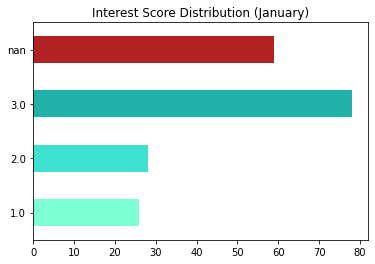

In [68]:
print(df['interest'].value_counts(dropna=False).sort_index())
df['interest'].value_counts(dropna=False).sort_index().plot(kind = 'barh', title='Interest Score Distribution (January)',
                                    color=['aquamarine','turquoise','lightseagreen','firebrick'])

1.0    78
2.0    57
NaN    56
Name: urgency, dtype: int64


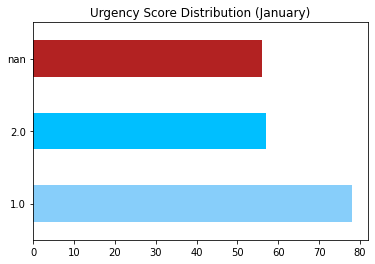

In [71]:
print(df['urgency'].value_counts(dropna=False).sort_index())
df['urgency'].value_counts(dropna=False).sort_index().plot(kind = 'barh', title='Urgency Score Distribution (January)',
                                    color=['lightskyblue','deepskyblue','firebrick'])

1    46
2    75
3    70
Name: interest_may, dtype: int64


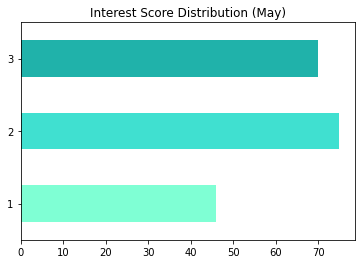

In [73]:
print(df['interest_may'].value_counts(dropna=False).sort_index())
df['interest_may'].value_counts(dropna=False).sort_index().plot(kind = 'barh', title='Interest Score Distribution (May)',
                                    color=['aquamarine','turquoise','lightseagreen'])

1    172
2     19
Name: urgency_may, dtype: int64


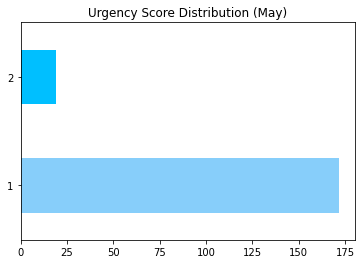

In [75]:
print(df['urgency_may'].value_counts(dropna=False).sort_index())
df['urgency_may'].value_counts(dropna=False).sort_index().plot(kind = 'barh', title='Urgency Score Distribution (May)',
                                    color=['lightskyblue','deepskyblue'])

# Encode data

In [ ]:
df = pd.read_csv('data/final_data - final_data.csv', index_col=0)
df.head()

,company,venture,basis,business,sector,jan_updates,urgency,interest,may_updates,allocation
0,ArrayComm,VVCN,NaN,ArrayComm focuses in the development and promo...,Tech-Enabler,"- Japan BD [LP, VGF value-add]\n- Long financi...",3.0,4.0,"• In Q1 2021, the Company achieved revenue of ...",active
1,Beijing Bridge CC Sports Technology,VVCN,No change. Vertex invested in the Series Seed ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Binance,VVCN,No change. Vertex participated in the Series A...,Binance Asia is a platform set up in Singapore...,Tech-Enabler,Study in VVSEA section,2.0,2.0,>> 3rd tranche of Series A is at lower pre-mon...,NaN
3,BlueX,VVCN,"New Investment. In Dec19, VVCIV invested RMB35...",BlueX is developing high-end Bluetooth chips f...,Tech-Enabler,Passed,3.0,4.0,"• In Q1 2021, the Company recognized revenue o...",not
4,Breadtrip,VVCN,"In Dec14, the company raised a US$20m financin...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[['company','venture','sector','allocation']]
df.dropna(subset=['allocation'], inplace=True)
df.dropna(subset=['sector'], inplace=True)
df.head(3)

,company,venture,sector,allocation
0,ArrayComm,VVCN,Tech-Enabler,active
3,BlueX,VVCN,Tech-Enabler,not
5,Carjoy,VVCN,Internet / Mobile,not


In [ ]:
df.to_csv('data/skeleton.csv')

In [ ]:
df.shape

(120, 4)

In [ ]:
import sklearn
from sklearn import preprocessing

venture_encoder = preprocessing.LabelEncoder()
sector_encoder = preprocessing.LabelEncoder()

In [ ]:
df['sector'] = df['sector'].astype(str)

In [ ]:
sector_list = list(df['sector'].unique())
sector_list.sort()
print(sector_list)

['AI', 'AI in banking', 'Agtech', 'Automation', 'Automotive', 'Autonomous Vehicle', 'B2B Managed Services', 'B2B eCommerce', 'Big Data', 'Cloud-based web platform', 'Consumer', 'Consumer Media', 'Corporate SaaS', 'Crypto', 'Crypto Currency', 'Cyber', 'Cyber Security', 'Cyber security', 'Data Management', 'Deep Learning', 'Deep Tech', 'DevOps', 'E-commerce', 'Edtech', 'Edutech SaaS', 'Enterprise', 'Enterprise SaaS', 'Enterprise SaaS and Marketplace', 'Enterprise Software', 'Entertainment', 'Fintech', 'Fintech - Consumer Financing', 'Healthcare', 'IOT/AI', 'Industrial', 'Insuretech', 'Insurtech', 'Internet / Mobile', 'Internet/Mobile', 'IoT', 'LegalTech', 'LogTech', 'Machine Learning', 'Manufacturing', 'Marketing Intelligence', 'Marketplace', 'Martech', 'Medical Device', 'Mobile / Internet', 'O2O & Services', 'O2O Consumer Retail', 'O2O and Services', 'Others / Healthcare', 'RFID', 'Robotics', 'SaaS', 'Software', 'Tech Enabler', 'Tech enabler', 'Tech-Enabler', 'Therapeutics', 'Travel', '

In [ ]:
df['venture'] = venture_encoder.fit_transform(df['venture'])
df.head(3)

,company,venture,sector,allocation
0,ArrayComm,0,Tech-Enabler,active
3,BlueX,0,Tech-Enabler,not
5,Carjoy,0,Internet / Mobile,not


In [ ]:
df['sector'] = sector_encoder.fit_transform(df['sector'])
df.head(3)

,company,venture,sector,allocation
0,ArrayComm,0,48,active
3,BlueX,0,48,not
5,Carjoy,0,31,not


In [ ]:
grouped = df.groupby(['venture','sector'])
grouped.head()

,company,venture,sector,allocation
0,ArrayComm,0,48,active
3,BlueX,0,48,not
5,Carjoy,0,31,not
12,Comjia,0,40,watch
14,Dexter,0,8,watch
...,...,...,...,...
5,Epirium Bio,1,49,active
6,IVANTIS,1,38,not
8,MOXIMED (passed),1,38,not
9,OBSIDIAN,1,49,watch


In [ ]:
df.to_csv('skeleton.csv')